# Error propagation

Estimate the error of a function according to the errors of its vaiables

https://en.wikipedia.org/wiki/Propagation_of_uncertainty

Importing libraries

In [1]:
from sympy import init_printing, Function, symbols, Symbol, Derivative, sqrt, log, Eq, latex
from IPython.display import display, Latex
init_printing(use_latex=True, latex_mode='equation*') 

Define variables

In [2]:
#f = Function('f')

F, G, M_1, M_2, r = symbols ('F, G, M_1, M_2, r')

DF = Symbol('\Delta F')
DM_1 = Symbol('\Delta M_1')
DM_2 = Symbol('\Delta M_2')
Dr = Symbol('\Delta r')

variables = (M_1, M_2, r)
deltadict = {M_1: DM_1, M_2: DM_2, r: Dr}

Define a mathematical function $F = f(M_1, M_2, r)$ :

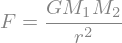

In [3]:
f = G * M_1 * M_2 / r**2

display(Eq(F,f))

Calculate the partial derevitives of the function F for each of its variables, sum up the squares of the obtained derivatives:

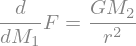

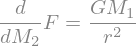

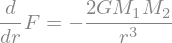

In [4]:
F_sum_squares = 0
f_sum_squares = 0

for variable in variables:
    display(Eq(Derivative(F, variable), Derivative(f, variable).doit()))
    f_sum_squares = f_sum_squares + (Derivative(f, variable))**2 * (deltadict[variable])**2
    F_sum_squares = F_sum_squares + (Derivative(F, variable))**2 * (deltadict[variable])**2

The square root of the sum is the estimated error of the function F

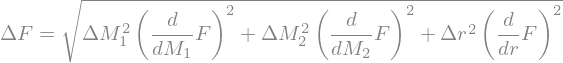

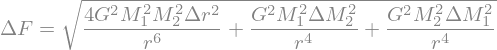

In [5]:
Df = sqrt (f_sum_squares)
DF_ = sqrt (F_sum_squares)

display(Eq(DF,DF_))
display(Eq(DF,Df.doit()))

In [6]:
f_num = f.evalf(subs={G:6.67384e-11, M_1:5.97237e24, M_2:7.342e22, r:3.84e8})

Df_num = Df.doit().evalf(subs={G:6.67384e-11, M_1:5.97237e24, DM_1:0.000001e24, M_2:7.342e22, DM_2:0.001e22, r:3.84e8, Dr:0.214e8})

result = "$$F = {} \pm {}$$".format(latex(f_num), latex(Df_num))
display(Latex(result))

<IPython.core.display.Latex object>